## Introduction to Seaborn
This tutorial will introduce you about a data visualization library, which is Seaborn. Seaborn is a library for graphing attractive graphs based on some statistical information in Python. We have learned Matplotlib in the class. Though Matplotlib is a sufficient library for users to plot graphs, it still leaves much to be developed. Seaborn is a library buit on the top of Matplotlib library and goes further for better plotting the graphs with different colors, styles with just a few lines of codes. In addition, Seaborn is able to work with NumPy and Pandas data structures.

This is an example of heatmap plotted with Seaborn:
[<img src="https://seaborn.pydata.org/_images/seaborn-heatmap-8.png">](https://seaborn.pydata.org/_images/seaborn-heatmap-8.png)

This heatmap shows the number of passengers taking flights in each month from 1949 to 1960. It visualized the passenger volume easily. From this heatmap, we can infer that the volumes growed from 1949 to 1960. And among the months of the year, passengers took flights most in July and August. 

## Tutorial Content
In this tutorial, we will show how to plot some statistical data by using Seaborn, NumPy and Pandas.

We will cover following topics in this tutorial:
* [Installing the libraries](#Installing-the-libraries)
* [Loading data and processing](#Loading-data-and-processing)
* [Plotting data](#Plotting-data)
* [1. Barchart with different colors](#1.-Barchart-with-different-colors)
* [2. Strip plot](#2.-Strip-plot)
* [3. Heatmap](#3.-Heatmap)
* [4. Point Plot](#4.-Point-Plot)
* [Example: Crimes in Pittsburgh](#Example:-Crimes-in-Pittsburgh)
* [Summary and References](#Summary-and-References)

## Installing the libraries

Before getting started, you need to install some related libraries. The first approach is to use `pip`:

       $ pip install seaborn
       
The second approach is to install it using `conda`:

       $ conda install seaborn
       
Alternatively, you can use `pip` to install the development version directly from github:

       $ pip install git+https://github.com/mwaskom/seaborn.git

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

## Loading data and processing

Now that we have installed and imported related libraries, we need to use some real data to practise this Seaborn. We will use data from Kaggle to analyze the video game sales. 

Firstly, we need to download the zip file `vgsales.csv.zip` from Kaggle website: https://www.kaggle.com/neilslab/seaborn-visualization?scriptVersionId=1189595/data. Then unzip it to get `vgsales.csv` file. This file contains more than 10,000 data. And the table for the video game sales is organized in the following manner.

| | | **Video Game Sales**         | 
|----------|-------------|---------|
| Rank     | Sales rank  | Numeric |
| Name | Name of game | String |
| Platform | Release platform for the game | String |
| Year | Year of release | Numeric |
| Genre | Game genre | String |
| Publisher | Company which released the game | String |
| NA_Sales | North american sales | Numeric |
| EU_Sales | European sales | Numeric |
| JP_Sales | Japan sales | Numeric |
| Other_Sales | Sales in other countries | Numeric | 
| Global_Sales | Sales around the worlds | Numeric |

You can copy this `vgsales.csv` directory into the same folder as this notebook, and you can then load the data using the following command.

In [2]:
df_sales = pd.DataFrame.from_csv("vgsales.csv")
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We could use the Pandas DataFrame class to transfer data from the csv file directly to DataFrame type, which will be useful for later usage. 

In [3]:
df_sales['Year'].fillna(df_sales['Year'].mean(), inplace=True)
df_sales['Year'].replace(2020, df_sales['Year'].mean(), inplace=True)
df_sales['Year'] = df_sales['Year'].astype(int)
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


From the dataset, we know that the year column has NA values and also unexpected value such as the year of 2020, So we need to be preprocessed it. For the NA values, there are several ways to process it.

1. Delete the row including NA values.
2. Replace NA values with mean value, median value.
3. Randomly choose a value within the range of the dataset.

For our dataset, we will choose mean value to replace these data. Since mean value will be in `numeric` type, we will transfer the data type of Year into `int` so that it will be more reasonable.

## Plotting data

In this section, we will use the data we have already processed to plot some graphs related to video game sales to show the functionality of Seaborn library. First, we will set the style of the graph.

In [4]:
sns.set_style("white")
# set the size of the figure to fit the screen
plt.rcParams['figure.figsize'] = 12,8

This will set the aesthetic style of the plots. The style can be a dictionary of `darkgrid, whitegrid, dark, white, ticks`, or one of them, or None. In this tutorial, we will set the style as `white`. And we will use `plt.rcParams` to  set the size of the figure.

### 1. Barchart with different colors

Firstly, we will use Seaborn to plot a barchart for video game sales around the world of every year. Barchart can also be plotted using Matplotlib library. However, Seaborn's palette function support the figure to be visualized more explicitly for users to distinguish the categories.

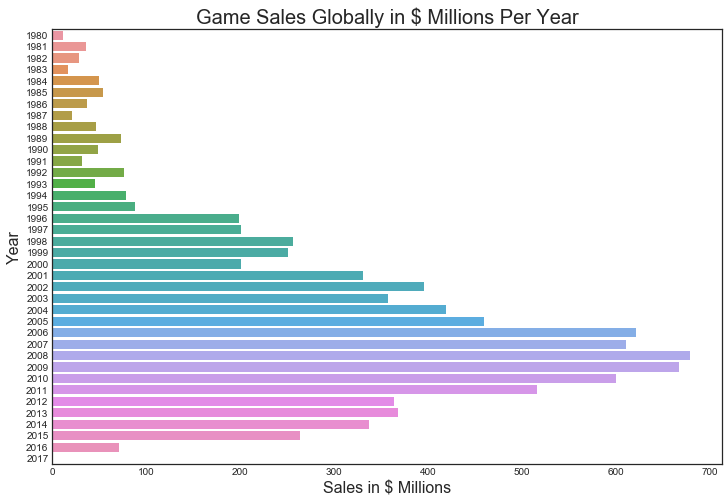

In [5]:
# sum of the sales in each year
sales_year = df_sales.groupby(['Year']).sum()
# plot barcharts
ax = sns.barplot(y = sales_year.index, x = sales_year['Global_Sales'], orient='h')
ax.set_xlabel(xlabel='Sales in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales Globally in $ Millions Per Year', fontsize=20)
plt.show()

Above barchart visualizes the total video game sales in every year with different colors. This is the default colors of the plot. 

Next, we will change the color of the barchart using Seaborn's `color_palette`. And by typing the `orient` parameter, we can change the direction of the barplot to be displayed.

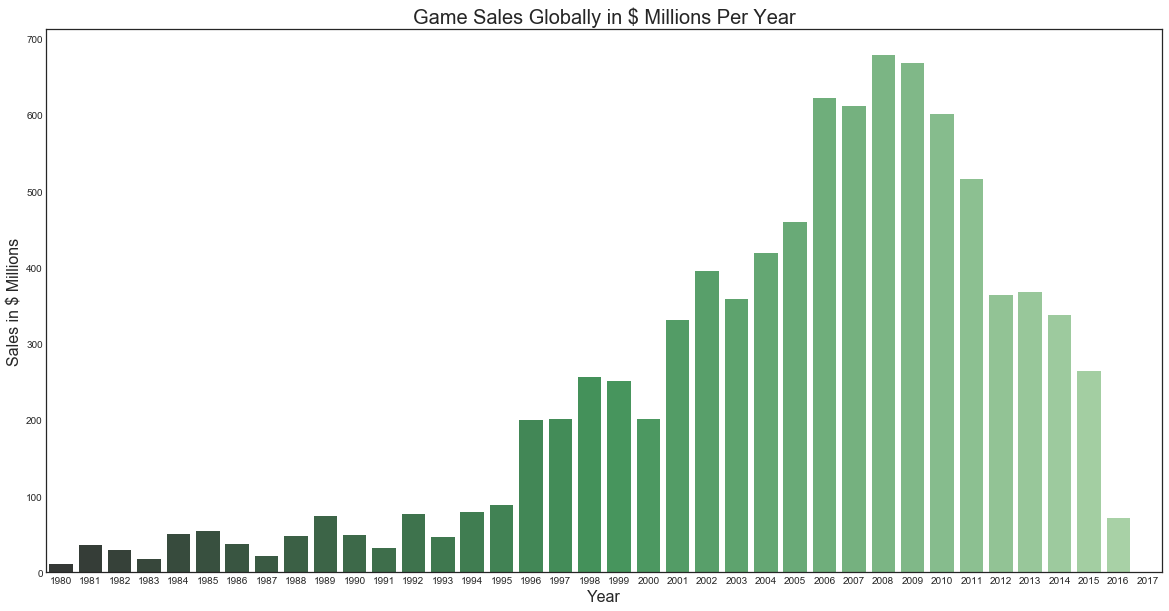

In [6]:
# choose the color of the plot
colors = sns.color_palette("Greens_d", len(sales_year.index))
# set the size of figure
plt.figure(figsize=(20,10))
ax = sns.barplot(x = sales_year.index, y = sales_year['Global_Sales'], orient='v', palette = colors)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Sales in $ Millions', fontsize=16)
ax.set_title(label='Game Sales Globally in $ Millions Per Year', fontsize=20)
plt.show()

Color is more important than other aspects for the figures. Because colors can express patterns in data clearly. Therefore, here comes the advantages of Seaborn. Seaborn palettes have the same hues as default Matplotlib color cycle. However, Seaborn has more attractive colors. By using Seaborn's `color_palette` function, we can easily reveal the useful information of statistical data. For the argument of this function, we can choose some built-in color maps in Color Brewer library, such as `"Blues", "BuGn_r", "GnBu_d", "RdBu"` and so on. Also, we can set the number of colors to be displayed and desaturation rate.

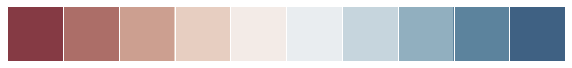

In [7]:
sns.set()
sns.palplot(sns.color_palette("RdBu", n_colors=10, desat=0.5))
plt.show()

Besides, when ploting categorical data, we can use `light_palette, dark_palette` and choose some base colors. These two function is to make sequential palette that blends light to color or dark to color.

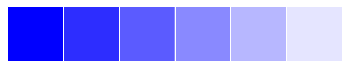

In [8]:
sns.palplot(sns.light_palette("blue", reverse=True))
plt.show()

Or, if we want to customize the hues of the colors by ourselves, we can type a set of colors to the argument.

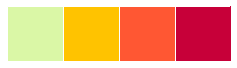

In [9]:
sns.palplot(sns.color_palette(["#DAF7A6", "#FFC300", "#FF5733", "#C70039"]))
plt.show()

### 2. Strip plot

In this seciton, we will visualize the scatter plot by displaying the "Highest Total Platform Revenue Globally in $ Millions Per Year". The advantage of the Seaborn library to show this plot is we can directly see the categorical values with several colors. Besides, we can set the label of x axis and y axis with label names, font sizes and degree of rotation. 

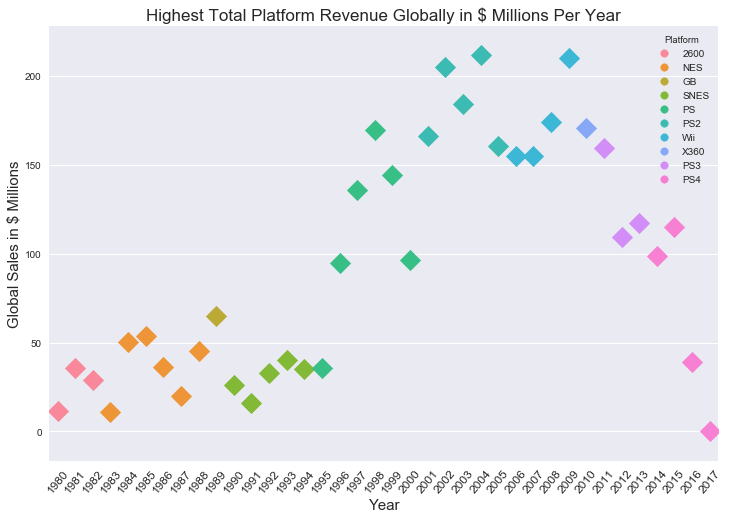

In [10]:
# get the relationship between revenue and year for each platform
# reference: https://www.kaggle.com/neilslab/seaborn-visualization/notebook
plat_sales = df_sales.pivot_table(values='Global_Sales', index='Platform', columns='Year', aggfunc='sum')
plat_sales.fillna(0, inplace = True)
platform = plat_sales.idxmax()
sales = plat_sales.max()
plat_sales = pd.concat([platform, sales], axis=1)
plat_sales.columns = ['Platform', 'Global Sales']
index = plat_sales.index.astype(int)
# plot the stripplot
ax = sns.stripplot(y = 'Global Sales', x = list(index), hue='Platform', marker="D", data=plat_sales, size=15)
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_ylabel(ylabel='Global Sales in $ Millions', fontsize=15)
ax.set_title(label='Highest Total Platform Revenue Globally in $ Millions Per Year', fontsize=17)
ax.set_xticklabels(labels = plat_sales.index.astype(int), fontsize=12, rotation=50)
plt.show();

### 3. Heatmap

In this seciton, we will introduce the heatmap of Seaborn library. We can plot the heatmap by using `heatmap`. Taking above example, we can also plot the heatmap of "Total Platform Revenue in $ Millions Per Year".

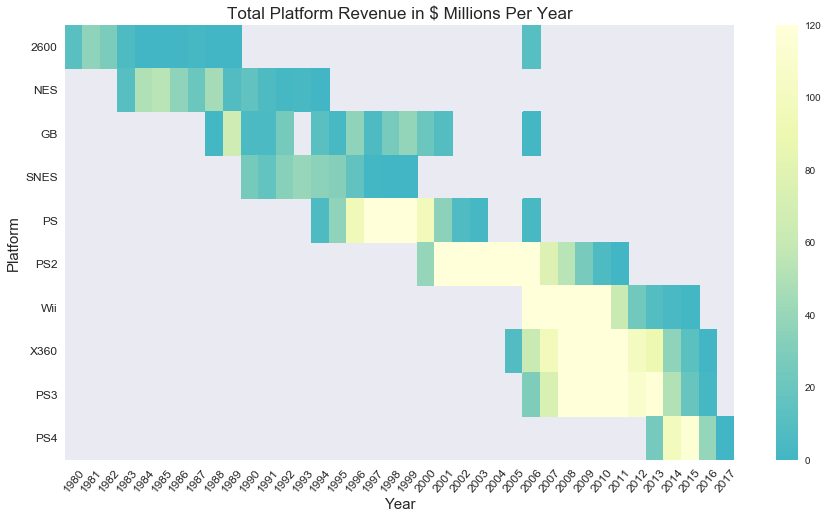

In [11]:
# reference: https://www.kaggle.com/neilslab/seaborn-visualization/notebook
# get the platform and its relevant revenue from original dataset
platforms = ['2600', 'NES', 'GB', 'SNES', 'PS', 'PS2', 'Wii', 'X360', 'PS3', 'PS4']
data = df_sales.pivot_table(values='Global_Sales', index='Year', columns='Platform', aggfunc='sum')
data = [[data[i] for i in platforms]]
data = np.array(data)
data = np.reshape(data, (10, 38))
data = pd.DataFrame(data)
data.index = platforms
data.columns = plat_sales.index.astype(int)
plt.figure(figsize=(15,8))
# plot the heatmap with cmap
ax = sns.heatmap(data=data, cmap='YlGnBu_r',center=0, vmin=0, vmax=120)
ax.set_xticklabels(labels = index, fontsize=12, rotation=50)
ax.set_yticklabels(labels = platforms, fontsize=12, rotation=0)
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_ylabel(ylabel='Platform', fontsize=15)
ax.set_title(label='Total Platform Revenue in $ Millions Per Year', fontsize=17)
plt.show();

In the `heatmap` function, we can put the data we need to plot in the argument. `data` should be a rectangular dataset. Also, if the data is Pandas DataFrame type, the index/column of the DataFrame will be used to label the columns and rows. `cmap` here is the Matplotlib colormap name. `center` parameter is the value at which to put the center of the data, and we set the center as 0. `vmin, vmax` is the values to anchor the map, in this case, we will take the range of 0 to 120 here.

### 4. Point Plot

In this section, we will visualize the total revenue of all the 4 regions with point plot so that we can see the trends of the revenue of different regions.

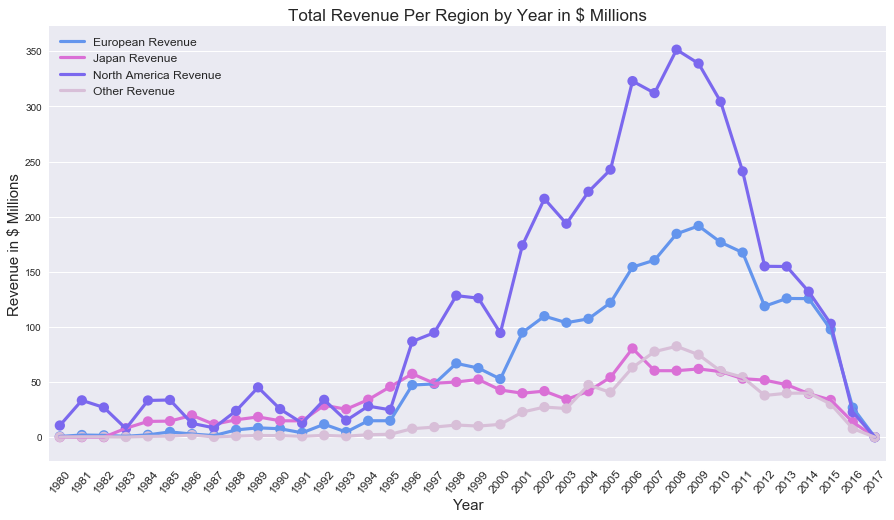

In [12]:
# reference: https://www.kaggle.com/neilslab/seaborn-visualization/notebook
# get the total revenues of 4 regions from original dataset
df_revenue = df_sales.groupby(['Year']).sum()
df_revenue = df_revenue.assign(Year = plat_sales.index.astype(int))
df_revenue.index = df_revenue['Year']
plt.figure(figsize=(15,8))
index = plat_sales.index.astype(int)
# plot four pointplots accordingly
ax = sns.pointplot(x=index, y=df_revenue['EU_Sales'], color='cornflowerblue')
ax = sns.pointplot(x=index, y=df_revenue['JP_Sales'], color='orchid')
ax = sns.pointplot(x=index, y=df_revenue['NA_Sales'], color='mediumslateblue')
ax = sns.pointplot(x=index, y=df_revenue['Other_Sales'], color='thistle')
ax.set_xticklabels(labels=df_revenue.index, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=15)
ax.set_title(label='Total Revenue Per Region by Year in $ Millions', fontsize=17)
ax.legend(handles=ax.lines[::len(df_revenue)+1], labels=['European Revenue','Japan Revenue','North America Revenue','Other Revenue'], fontsize=12)
plt.show();

Pointplot of Seaborn library helps us better distinguish the trends of different categories. It is widely used in time series data as above. For different categories, we can set different colors for them. 

## Example: Crimes in Pittsburgh

In this section, we will use an example to better illustrate the functions of Seaborn library tightly. We will use the data of Pittsburgh crimes. The dataset can be found from website: https://data.wprdc.org/dataset/arrest-data. We need to download the "Arrest" data and change the name of the file as "Pittsburgh.csv".

Firstly, we should load the data, and preprocess the data. After reviewing dataset, we see that `COUNCIL_DISTRICT, PUBLIC_WORKS_DIVISION` has no data. So, we will simply delete it. Also, since the dataset is very large, we will delete rows that contians NA values.

In [13]:
# load the crimes data
df_crime = pd.DataFrame.from_csv("Pittsburgh.csv")
print("Before Deleting NA values:", len(df_crime))
# remove the unuseful data
df_crime = df_crime.drop(['COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION'], axis=1)
# preprocess data with NA valus and unexpected value
df_crime = df_crime.dropna(axis=0)
df_crime['AGE'].replace(999, int(df_crime['AGE'].mean()), inplace=True)
print("After Deleting NA values:", len(df_crime))

Before Deleting NA values: 18667
After Deleting NA values: 17807


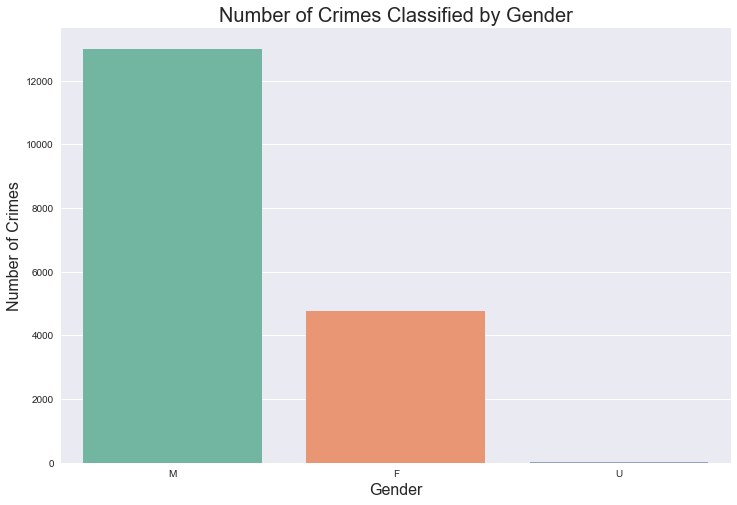

In [14]:
plt.figure(figsize=(12,8))
# plot the countplot about gender and the number of crimes accordingly
ax = sns.countplot(x="GENDER", data=df_crime, palette="Set2")
ax.set_xlabel(xlabel='Gender', fontsize=16)
ax.set_ylabel(ylabel='Number of Crimes', fontsize=16)
ax.set_title(label='Number of Crimes Classified by Gender', fontsize=20)
plt.show()

Here, we used `countplot` to count number of crimes of each gender. This function is very useful since we do not need to precalculate the count of each categories.

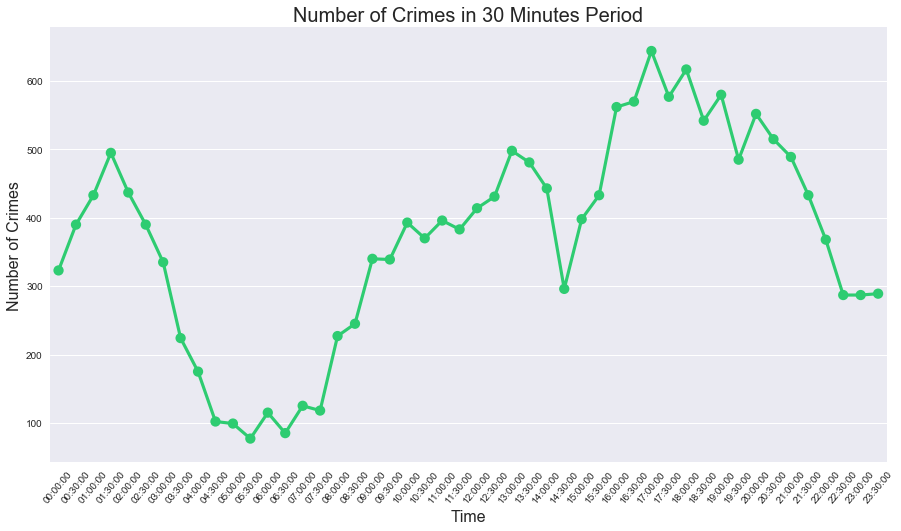

In [15]:
# plot the pointplot of number of crimes related to time with the period of 30 minutes intervals
import datetime
df_crime['ARRESTTIME'] = pd.to_datetime(df_crime['ARRESTTIME'])
result_x = []
result_y = []
# group time within 30 minutes intervals
for name, group in df_crime.groupby([df_crime['ARRESTTIME'].dt.hour, df_crime['ARRESTTIME'].dt.minute // 30 * 30]):
    result_x.append(datetime.time(name[0], name[1], 0))
    result_y.append(len(group))
plt.figure(figsize=(15,8))
# plot point plot with specified color
ax = sns.pointplot(x=result_x, y=result_y, color="#2ecc71")
ax.set_xticklabels(labels = result_x, fontsize=10, rotation=50)
ax.set_xlabel(xlabel='Time', fontsize=16)
ax.set_ylabel(ylabel='Number of Crimes', fontsize=16)
ax.set_title(label='Number of Crimes in 30 Minutes Period', fontsize=20)
plt.show()

Besides, the plots we have introduced above, there are some other plots we can use for this dataset. We will use `lvplot` to plot the letter value plot of the crimes.

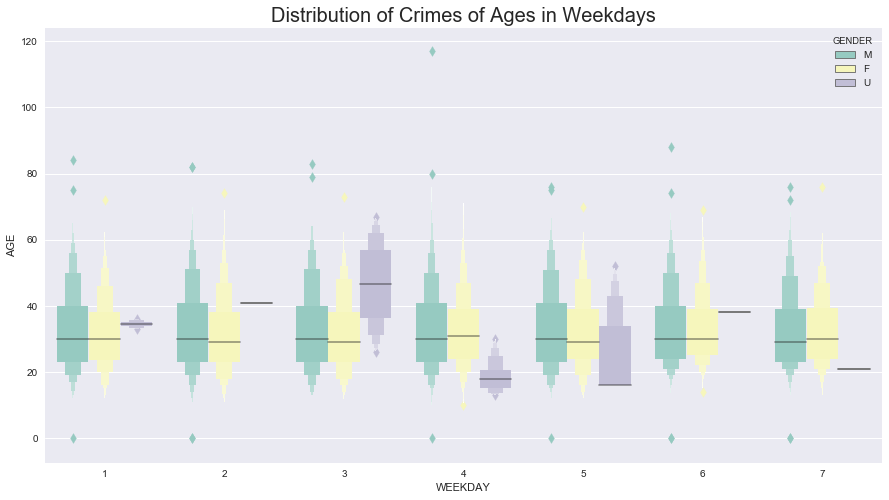

In [16]:
# get the weekday of each crimes and plot the distribution of crimes and ages
df_crime = df_crime.assign(WEEKDAY = df_crime['ARRESTTIME'].dt.dayofweek+1) 
plt.figure(figsize=(15,8))
ax = sns.lvplot(x="WEEKDAY", y="AGE", hue="GENDER", data=df_crime, palette="Set3")
ax.set_title(label='Distribution of Crimes of Ages in Weekdays', fontsize=20)
plt.show()

Also, we can do `violinplot` for the same data, which is shown below.

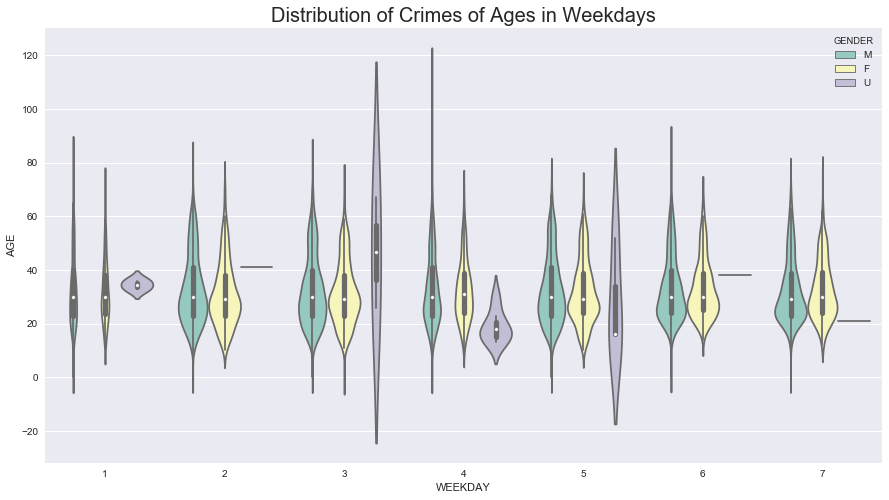

In [17]:
# plot above data with violinplot
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="WEEKDAY", y="AGE", hue="GENDER", data=df_crime, palette="Set3")
ax.set_title(label='Distribution of Crimes of Ages in Weekdays', fontsize=20)
plt.show()

## Summary and References
This tutorial introduces a few functions of Seaborn library in Python. Compared with Matplotlib, the features of palette is one of the advantages of Seaborn to visualize data more clearly. Much more detail about the Seaborn libray is available from the following link.
1. Seaborn: https://seaborn.pydata.org/
2. Visualization with Seaborn: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
3. Pandas & Seaborn - A guide to handle & visualize data in Python: https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
4. Kaggle: https://www.kaggle.com/neilslab/seaborn-visualization/notebook